# Calidad de Aire en New York

## Acerca del conjunto de datos
El conjunto de datos contiene información sobre los datos de vigilancia de la calidad del aire de la ciudad de Nueva York.
La contaminación del aire es una de las amenazas ambientales más importantes para las poblaciones urbanas y, si bien todas las personas están expuestas, las emisiones contaminantes, los niveles de exposición y la vulnerabilidad de la población varían según los vecindarios.

# Introducción 

La contaminación del aire es una de las amenazas ambientales más significativas que enfrentan las poblaciones urbanas en el siglo XXI. A medida que las ciudades continúan expandiéndose y la actividad industrial aumenta, la calidad del aire se deteriora, afectando la salud y el bienestar de millones de personas en todo el mundo. La ciudad de Nueva York, una de las metrópolis más pobladas y dinámicas, no es una excepción a este problema. En este contexto, el uso de la analítica de datos se ha vuelto esencial para monitorear, entender y mitigar los efectos nocivos de la contaminación del aire.

El conjunto de datos analizado en este trabajo contiene información detallada sobre la calidad del aire en diversos vecindarios de la ciudad de Nueva York. Estos datos incluyen mediciones de contaminantes como partículas finas (PM2.5), dióxido de nitrógeno (NO2) y ozono (O3), entre otros. La riqueza y diversidad de estos datos ofrecen una oportunidad única para explorar cómo varían los niveles de contaminación según los vecindarios y cómo estas variaciones pueden influir en la salud pública y las políticas ambientales.

Además, este estudio busca identificar patrones de exposición y vulnerabilidad en diferentes comunidades, reconociendo que no todas las áreas de la ciudad están igualmente afectadas por la contaminación. Factores como la densidad poblacional, la cercanía a fuentes de emisión, y las características sociodemográficas pueden contribuir a una exposición desigual entre los residentes de Nueva York. Por ello, la analítica de datos no solo proporciona una comprensión más profunda de la distribución espacial y temporal de los contaminantes, sino que también es una herramienta fundamental para informar la toma de decisiones y la implementación de estrategias de mitigación efectivas.

### Importacion de Pandas, numpy, matplotlib y el .cvs

En esta sección se importan las librerías necesarias para el análisis de datos. Las librerías principales son:

1. Pandas: Utilizada para la manipulación y análisis de datos. Facilita la lectura de archivos CSV y el manejo de DataFrames.
2. NumPy: Usada para cálculos numéricos y operaciones matriciales.
3. Matplotlib y Seaborn: Librerías de visualización que permiten crear gráficos y visualizar patrones en los datos.
4. Scikit-learn: Utilizada para la implementación de técnicas de aprendizaje automático.

In [121]:
import pandas as pd
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [122]:
df = pd.read_csv('../Datasets/Air_Quality.csv', sep=',')

---

# Analisis Exploratorio de Dato

En este apartado muestra las primeras cinco filas del DataFrame

In [123]:
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


### Numero de filas y columnas


Se hizo rl uso de 'shape' para obtener el tamaño o las dimensiones de nuestro DataFrame.

In [124]:
df.shape

(16122, 12)

### Tipos de datos

Se utilizo 'dtypes'  para mostrar los tipos de datos de cada columna en nuestro DataFrame.

In [125]:
df.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

### Nombre de las columnas

Se  utilizo 'columns' para concer el nombre de las calumnas

In [126]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

### Informacion General y Descripcion General
Se proporciona un resumen de los datos, incluyendo el número de filas, columnas y tipos de datos presentes en el conjunto.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [128]:
df.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,16122.000000,16122.000000,1.612200e+04,16122.000000,0.0
mean,339480.955589,427.131063,6.133394e+05,19.129163,NaN
std,194099.809551,109.657607,7.916715e+06,21.673789,NaN
min,130355.000000,365.000000,1.000000e+00,0.000000,NaN
25%,172183.250000,365.000000,2.020000e+02,8.460000,NaN
50%,221882.500000,375.000000,3.030000e+02,13.900000,NaN
75%,547749.750000,386.000000,4.040000e+02,25.470000,NaN
max,671122.000000,661.000000,1.051061e+08,424.700000,NaN


---

# Eliminación de NaNs
Eliminar valores NaN (Not a Number) de unuestro DataFrame es una tarea común en la limpieza y preprocesamiento de datos con Pandas. Los valores NaN representan datos faltantes o incompletos y pueden interferir con el análisis y modelado si no se manejan adecuadamente. Aquí te proporcionaré una descripción detallada sobre cómo eliminar NaNs de un DataFrame utilizando diferentes métodos y técnicas en Pandas.

### Ubicación de NaNs

Se utiliza '.isna()' para detectar valores faltantes en nuesto DataFrame o Series. Los valores faltantes son representados comúnmente por NaN (Not a Number) en los datos numéricos y None en los datos de tipo objeto o categorías. Este método devuelve un DataFrame o una Serie de booleanos con el mismo tamaño que el original, donde True indica que el valor es NaN o None y False indica que el valor es no faltante.

In [129]:
df.isna()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,False,False,False,False,False,False,False,False,False,False,False,True
16118,False,False,False,False,False,False,False,False,False,False,False,True
16119,False,False,False,False,False,False,False,False,False,False,False,True
16120,False,False,False,False,False,False,False,False,False,False,False,True


### Total de NaNs

Se utilizo 'isna().sum()' para detectar y contar los valores faltantes (NaN) en nuestro DataFrame

In [130]:
df.isna().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16122
dtype: int64

### Numero de NaNs por Columna
El uso de axis en la función sum() nos permitio especificar la dirección en la que deseas realizar la operación de suma, lo cual es particularmente nos fue útil para nuestro DataFrames. Al utilizar isna().sum() junto con el parámetro axis, puedes contar los valores faltantes (NaN) a lo largo de columnas o filas según lo necesites.

In [131]:
df.isna().sum(axis = 'columns')

0        1
1        1
2        1
3        1
4        1
        ..
16117    1
16118    1
16119    1
16120    1
16121    1
Length: 16122, dtype: int64

In [132]:
df.isna().sum(axis = 'index')

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16122
dtype: int64

### Copia de Dataset Original

Solo se hizo una copia del DataFrame para no modificar el documento original

In [133]:
df_limpiar = df.copy()
df_limpiar

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28,NaN


### Proceso de Eliminar NaNs
Se utilizo la función dropna() de Pandas para eliminar columnas que contienen únicamente valores faltantes (NaN) de nuestro DataFrame llamado df_limpiar y se guardo en otro para tener no modificar el original

In [134]:
df_Dropped = df_limpiar.dropna(axis=1, how='all')
df_Dropped

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89
...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28


---

# Reindexación 

Se hizo para la reconstrucción o actualización de índices utilizados en bases de datos o sistemas de almacenamiento de datos analíticos para mejorar el rendimiento de las consultas y la eficiencia en el acceso a los datos. Aquí te doy una descripción detallada del proceso en este ámbito:

In [135]:
df_3 = df_Dropped.copy()
df_3

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89
...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28


### Revision de Secuencia de Index
 Se hizo la función revisar_secuencia_index asegura que los índices del DataFrame df_3 siguen una secuencia numérica continua desde el valor mínimo hasta el valor máximo de los índices actuales. Si los índices están en la secuencia esperada, la función confirma que todo está correcto; de lo contrario, indica que ha habido un cambio en la secuencia de índices.

In [136]:
def revisar_secuencia_index():
    indices_actuales = df_3.index
    #Crear una secuencia esperada (por ejemplo, una secuencia numérica)
    secuencia_esperada = pd.Index(range(indices_actuales.min(), indices_actuales.max() + 1))

    # Comparar
    if indices_actuales.equals(secuencia_esperada):
        print("La secuencia de índices es la esperada.")
    else:
        print("La secuencia de índices ha cambiado.")

In [137]:
revisar_secuencia_index()

La secuencia de índices es la esperada.


In [138]:
df_3.reset_index(drop = True)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89
...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28


Lo que hace del ´df_3.reset_index(drop=True)´ reinicia el índice del DataFrame df_3, generando un nuevo índice numérico continuo y descartando el índice original sin agregarlo como una columna en el DataFrame resultante.

In [139]:
df_3.reset_index()

,index,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70
16118,16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56
16119,16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65
16120,16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28


# Renombramiento de Columnas
El diccionario column_name_mapping se utiliza para renombrar columnas en un DataFrame en pandas. Este diccionario mapea nombres de columnas en inglés a sus correspondientes nombres en otro idioma (probablemente español en este caso), facilitando la localización o la claridad en la interpretación de los datos.

In [140]:
column_name_mapping = {
'Unique ID': 'ID ', 
'Indicator ID': 'ID Indicador', 
'Name':'Tipo Contaminante', 
'Measure': 'Medida', 
'Measure Info': 'Info Medida',
'Geo Type Name': 'Tipo Geografico', 
'Geo Join ID': 'ID Geografico', 
'Geo Place Name' :'Lugar Geografico' , 
'Time Period': 'Periodo Tiempo' ,
'Start_Date': 'Fecha Inicio', 
'Data Value': 'Valor'
}

Se guardan en otra variable los campos y se modifica las columnas por el dicciónario

In [141]:
df_rename = df_3.rename(columns= column_name_mapping)
df_rename.head(5)

,ID,ID Indicador,Tipo Contaminante,Medida,Info Medida,Tipo Geografico,ID Geografico,Lugar Geografico,Periodo Tiempo,Fecha Inicio,Valor
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89


---


# TRANSFORMACIÓN, FILTRACIÓN Y REORDENAMIENTO
1. Transformación: Modifica los datos para mejorar su calidad o adaptarlos a requisitos específicos.
2. Filtración: Selecciona un subconjunto de datos basados en criterios específicos.
3. Reordenamiento: Organiza los datos para mejorar su presentación o facilitar el análisis.


In [142]:
df_Limpio= df_3.reset_index(drop = True)
df_Limpio

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89
...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28


In [143]:
df_TablaLimpia = df_Limpio.rename(columns= column_name_mapping)
df_TablaLimpia.head(5)

,ID,ID Indicador,Tipo Contaminante,Medida,Info Medida,Tipo Geografico,ID Geografico,Lugar Geografico,Periodo Tiempo,Fecha Inicio,Valor
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89


In [144]:
df_TablaLimpia.dtypes

ID                     int64
ID Indicador           int64
Tipo Contaminante     object
Medida                object
Info Medida           object
Tipo Geografico       object
ID Geografico          int64
Lugar Geografico      object
Periodo Tiempo        object
Fecha Inicio          object
Valor                float64
dtype: object

## Cambio de Formato a la fecha
La función pd.to_datetime(df_TablaLimpia['Fecha Inicio']) se utilizo para convertir los datos de una columna de nuestro  DataFrame en objetos de fecha y hora.

In [145]:
pd.to_datetime(df_TablaLimpia['Fecha Inicio'] )

0       2013-06-01
1       2014-06-01
2       2013-06-01
3       2014-06-01
4       2008-12-01
           ...    
16117   2020-06-01
16118   2020-06-01
16119   2020-06-01
16120   2020-06-01
16121   2020-06-01
Name: Fecha Inicio, Length: 16122, dtype: datetime64[ns]

In [146]:
df_TablaLimpia['Fecha Inicio'] = pd.to_datetime(df_TablaLimpia['Fecha Inicio'] )

In [147]:
df_TablaLimpia.head(5)

,ID,ID Indicador,Tipo Contaminante,Medida,Info Medida,Tipo Geografico,ID Geografico,Lugar Geografico,Periodo Tiempo,Fecha Inicio,Valor
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01,5.89


In [148]:
df_TablaLimpia.dtypes

ID                            int64
ID Indicador                  int64
Tipo Contaminante            object
Medida                       object
Info Medida                  object
Tipo Geografico              object
ID Geografico                 int64
Lugar Geografico             object
Periodo Tiempo               object
Fecha Inicio         datetime64[ns]
Valor                       float64
dtype: object

---

# Estimados de Localización
Son estadísticas descriptivas que proporcionan una idea de dónde se sitúa la distribución de un conjunto de datos.

## Promedio

El promedio es el valor obtenido al sumar todos los valores de un conjunto de datos y dividir el resultado entre la cantidad total de valores. Es una medida de tendencia central que representa un valor típico en un conjunto de datos.

In [149]:
df_TablaLimpia['Valor'].mean()

19.129162518473574

## Mediana

La mediana es el valor que divide un conjunto de datos ordenados en dos partes iguales. Es otra medida de tendencia central que representa el valor medio de un conjunto de datos.


In [150]:
df_TablaLimpia['Valor'].median()

13.9

---

# Media Trunca

La media truncada (o promedio truncado) es un estimador de localización que se calcula eliminando un porcentaje de valores más bajos y un porcentaje de valores más altos de un conjunto de datos, y luego calculando el promedio del conjunto restante. 

In [151]:
df_TablaLimpia['Valor'].median()

13.9

In [152]:
df_TablaLimpia['Valor'].mean()

19.129162518473574

Este fragmento de código define un porcentaje de truncamiento del 10% (porcion_truncar = 0.1) y calcula la media truncada de la columna Valor en el DataFrame df_TablaLimpia utilizando la función trim_mean() de la biblioteca scipy.stats. La media truncada se calcula eliminando el 10% de los valores más bajos y el 10% de los valores más altos, y luego promediando los valores restantes. Esta técnica se utiliza para obtener una medida de tendencia central que es menos sensible a valores atípicos o extremos, proporcionando una representación más robusta y precisa del centro de los datos. El resultado se almacena en la variable media_truncada_precio.

In [153]:
porcion_truncar =0.1
media_truncada_precio=trim_mean(df_TablaLimpia['Valor'],porcion_truncar)

In [154]:
media_truncada_precio

16.213821040716468

In [155]:
df_TablaLimpia['Valor'].mean()

19.129162518473574

---

# Desviación estándar
La desviación estándar es una medida estadística que cuantifica la cantidad de variación o dispersión de un conjunto de datos.

In [156]:
df_TablaLimpia['Valor']

0        34.64
1        33.22
2        31.25
3        31.15
4         5.89
         ...  
16117    28.70
16118    29.56
16119    29.65
16120    29.28
16121    28.93
Name: Valor, Length: 16122, dtype: float64

In [157]:
df_TablaLimpia['Valor'].mean()

19.129162518473574

El método df_TablaLimpia['Valor'].std() calcula la desviación estándar de la columna 'Valor' en el DataFrame df_TablaLimpia. La desviación estándar es una medida de dispersión que indica cuánto varían los valores en la columna con respecto a su media. Un valor alto de desviación estándar sugiere que los datos están muy dispersos alrededor de la media, mientras que un valor bajo indica que los datos están más concentrados. Esta medida es crucial para entender la variabilidad y la consistencia de los datos en la columna 'Valor', permitiendo una mejor interpretación de la distribución de los valores.

In [158]:
df_TablaLimpia['Valor'].std()

21.673789259668315

---

# Estadisticos de Orden
Los estadísticos de orden son medidas que proporcionan información sobre la posición y la distribución relativa de los datos en un conjunto. 

### Valor Maximo
El método df_TablaLimpia['Valor'].max() devuelve el valor máximo encontrado en la columna 'Valor' del DataFrame df_TablaLimpia. Este estadístico proporciona el valor más alto de la serie de datos, lo que indica el punto extremo superior de la distribución. Conocer el valor máximo es útil para entender el rango de los datos, identificar posibles valores atípicos o extremos y tener una idea del límite superior de las observaciones. En resumen, max() ayuda a capturar el valor más grande dentro de un conjunto de datos, ofreciendo una perspectiva sobre los extremos superiores de la distribución.

In [159]:
df_TablaLimpia['Valor'].max()

424.7

### Mediana
El método df_TablaLimpia['Valor'].median() calcula la mediana de la columna 'Valor' en el DataFrame df_TablaLimpia. La mediana es el valor que divide el conjunto de datos en dos mitades iguales, de modo que el 50% de los valores están por debajo de este punto y el otro 50% por encima. Este estadístico es especialmente útil para obtener una medida de tendencia central que no se ve afectada por valores extremos o atípicos, proporcionando una visión más robusta de la ubicación central de los datos. En resumen, median() ofrece una representación del valor típico en el conjunto de datos, incluso en presencia de variabilidad o sesgo.

In [160]:
df_TablaLimpia['Valor'].median()

13.9

### Quantiles
El método df_TablaLimpia['Valor'].quantile(0.25) calcula el primer cuartil (Q1) de la columna 'Valor' en el DataFrame df_TablaLimpia. El primer cuartil es el valor que separa el 25% inferior de los datos del 80% superior, proporcionando un punto de referencia para la distribución de los datos. Este estadístico es útil para entender la dispersión de los datos y para identificar la posición de los valores en el tramo inferior de la distribución. En resumen, quantile(0.25) ayuda a evaluar cómo se distribuyen los datos en el primer cuarto del rango, ofreciendo una perspectiva sobre la concentración de valores en la parte baja del conjunto de datos.

In [161]:
df_TablaLimpia['Valor'].quantile(0.25)

8.46

In [162]:
df_TablaLimpia['Valor'].quantile(0.50)

13.9

In [163]:
df_TablaLimpia['Valor'].quantile(0.75)

25.47

In [164]:
df_TablaLimpia['Valor'].quantile(0.8)

27.7

## Realizando los estadisticos de roden en numpy

### NaNs por numpy

In [165]:
df_TablaLimpia['Valor'].isna().sum()

0

### Quantiles por numpy

In [166]:
np.percentile(df_TablaLimpia['Valor'], 25)

8.46

In [167]:
np.percentile(df_TablaLimpia['Valor'], 50)

13.9

In [168]:
np.median(df_TablaLimpia['Valor'])

13.9

---

# Graficas

### Histogramas

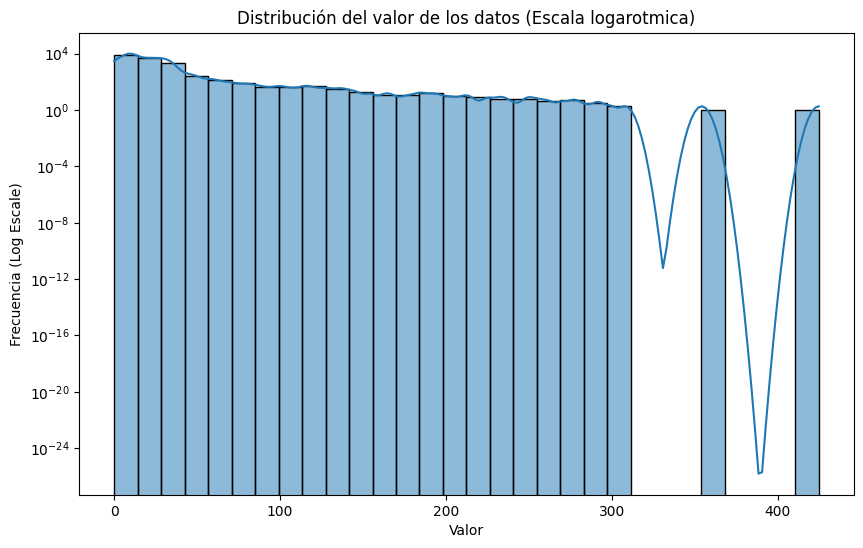

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(df_TablaLimpia['Valor'], bins=30, kde=True)
plt.yscale('log')  # Cambia la escala del eje y a logarítmica
plt.title('Distribución del valor de los datos (Escala logarotmica)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia (Log Escale)')
plt.show()

### Gráfico de Bloxplot

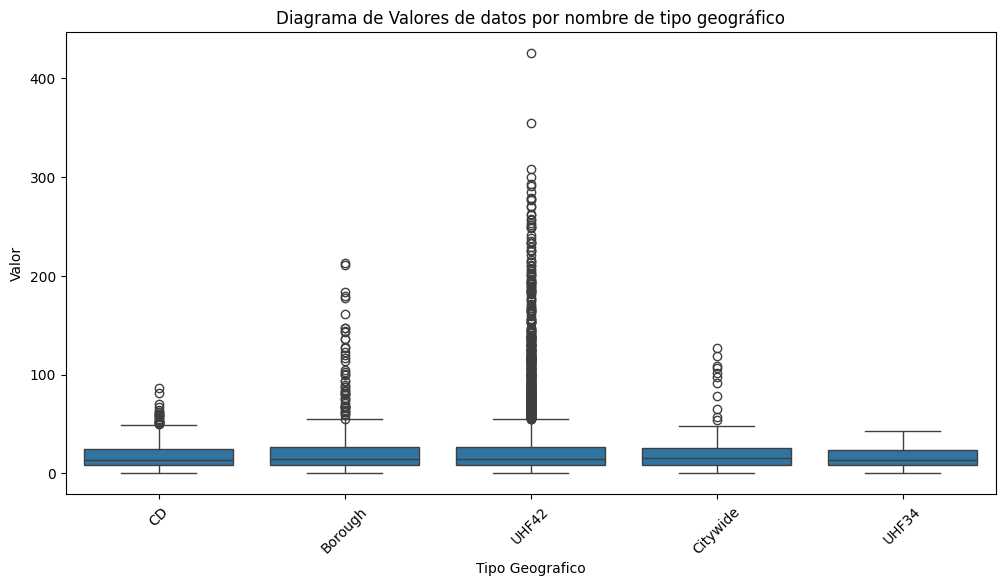

In [170]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo Geografico', y='Valor', data=df_TablaLimpia)
plt.title('Diagrama de Valores de datos por nombre de tipo geográfico')
plt.xlabel('Tipo Geografico')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

### Gráfico de barras

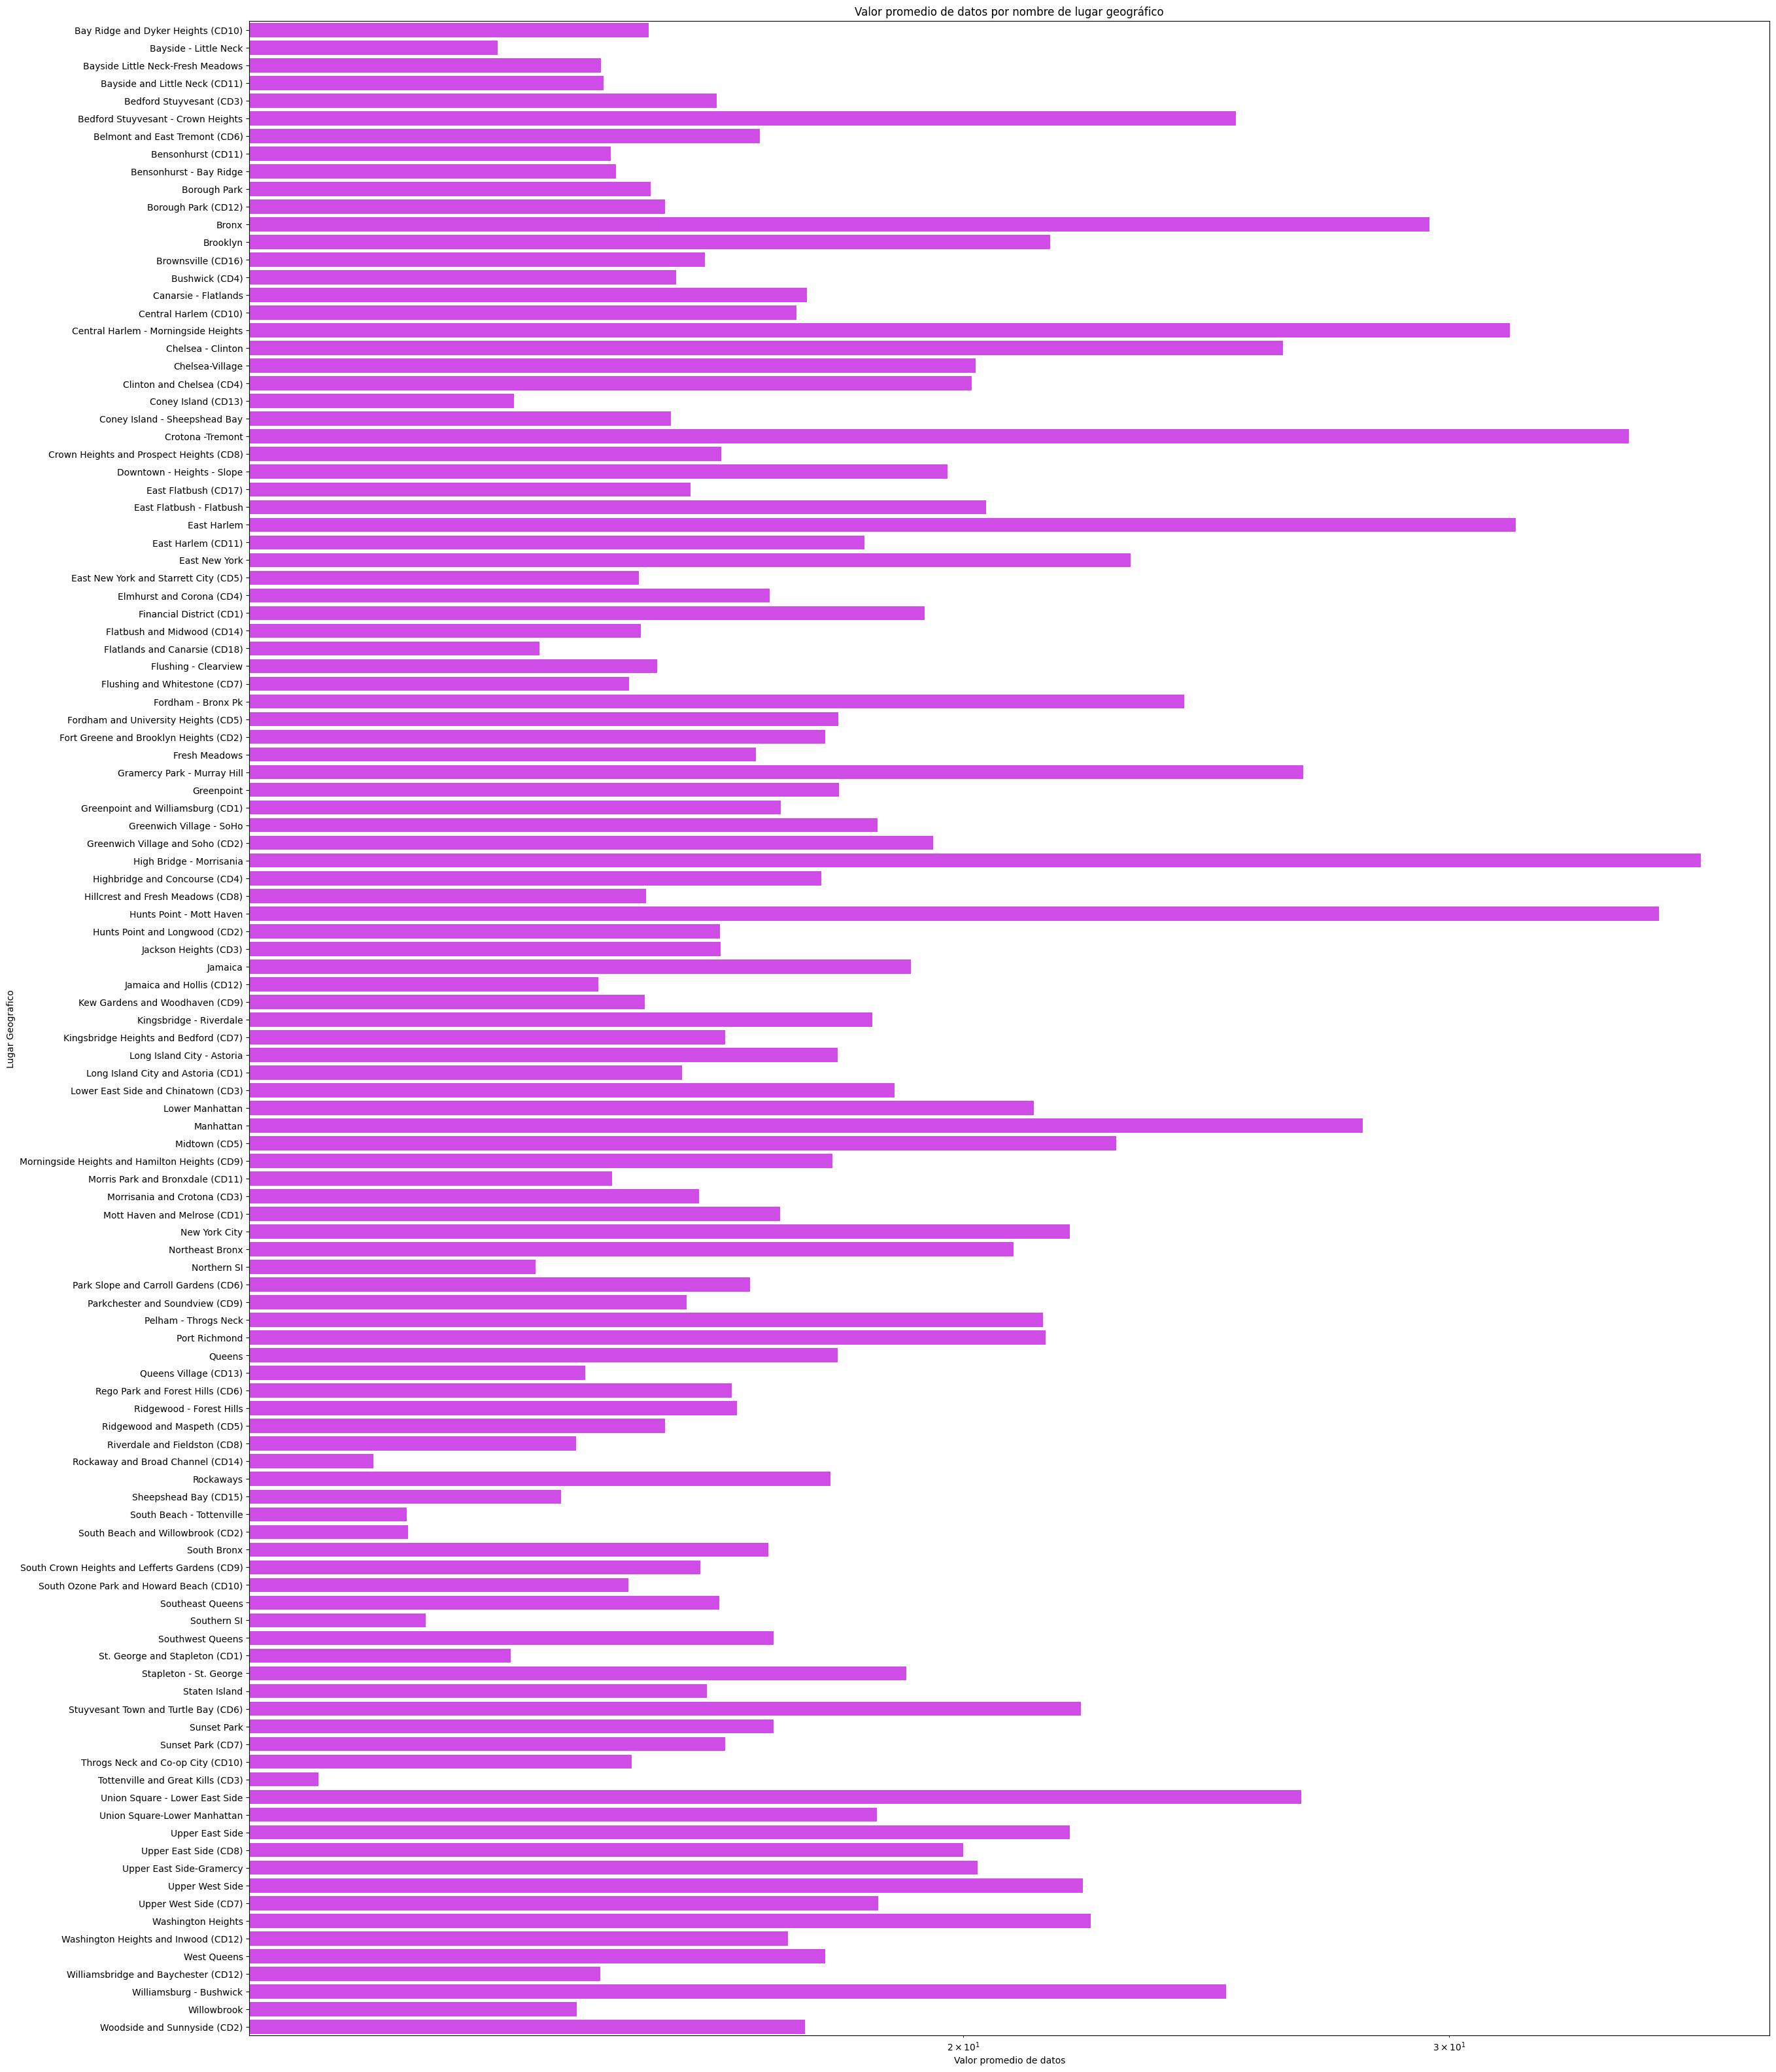

In [171]:
plt.figure(figsize=(30, 40))
average_data_value = df_TablaLimpia.groupby('Lugar Geografico')['Valor'].mean().reset_index()
sns.barplot(x='Valor', y='Lugar Geografico', data=average_data_value, color = '#e333ff')
plt.xscale('log')  # Cambia la escala del eje y a logarítmica
plt.title('Valor promedio de datos por nombre de lugar geográfico')
plt.xlabel('Valor promedio de datos')
plt.ylabel('Lugar Geografico')
plt.show()

### Gráfico de líneas

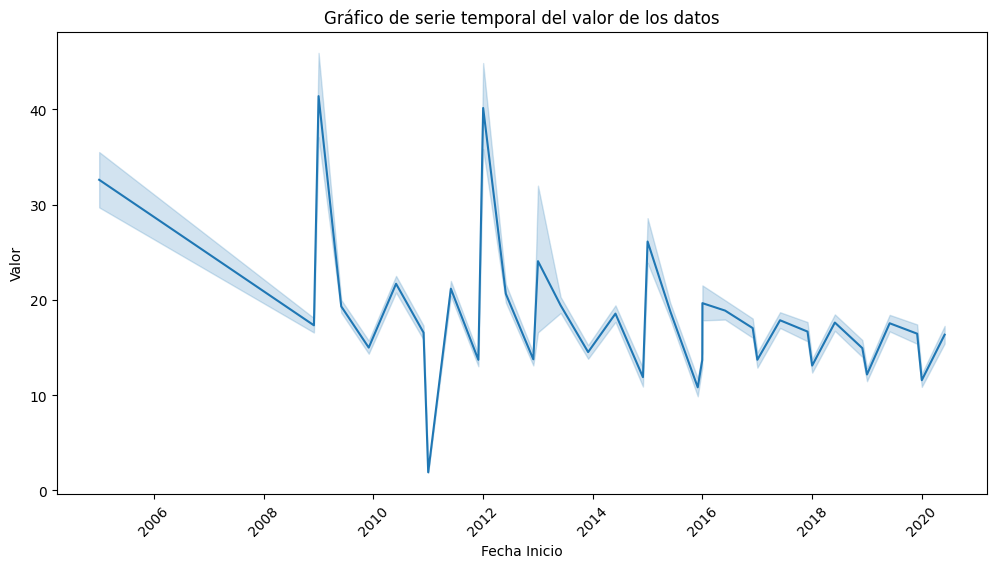

In [172]:
plt.figure(figsize=(12, 6))
df_sorted = df_TablaLimpia.sort_values('Fecha Inicio')
sns.lineplot(x='Fecha Inicio', y='Valor', data=df_sorted)
plt.title('Gráfico de serie temporal del valor de los datos')
plt.xlabel('Fecha Inicio')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

### Gráfico de  Violin

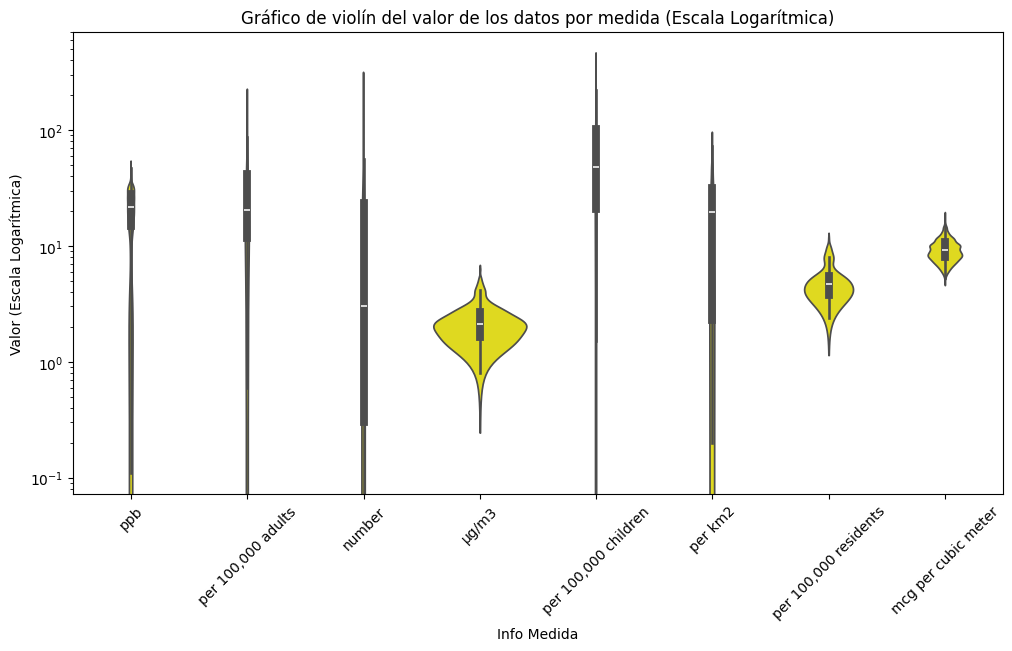

In [173]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Info Medida', y='Valor', data=df_TablaLimpia, color = '#fff700')
plt.yscale('log')  # Cambia la escala del eje y a logarítmica
plt.title('Gráfico de violín del valor de los datos por medida (Escala Logarítmica)')
plt.xlabel('Info Medida')
plt.ylabel('Valor (Escala Logarítmica)')
plt.xticks(rotation=45)
plt.show()